### Henon map

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/87672565712868250e7d2b410307bb1b047f31a7)
![](https://upload.wikimedia.org/wikipedia/commons/0/06/Henon_map.gif)

Classical Hénon map (15 iterations). Sub-iterations calculated using three steps decomposition.

In [1]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

In [2]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from ipywidgets import interactive, fixed, IntSlider, HBox, Layout,interactive_output,widgets
from IPython.display import clear_output,display,HTML

In [5]:
    
def plot_3D(df,value):
    
     fig = go.Figure(data=[go.Scatter3d(
                                x = df[value][0::3],
                                y = df[value][1::3],
                                z = df[value][2::3],
                                mode='markers',
                                marker=dict(size=3,color=[i for i in range(len(df[value][0::3]))])
                                )])
    
     fig.show()
    

In [6]:
def plot_2D(df):
    
    fig = go.Figure(data=[go.Scattergl(
                                x = df["X"],
                                y = df["Y"],
                                mode='markers',
                                marker=dict(size=3)
                                )])
    
    fig.show()
    
    fig = make_subplots(rows=1, cols=2,subplot_titles=["X time series","Y time series"])


    fig.add_trace(go.Scattergl(
                                    x = df["t"],
                                    y = df["X"],
                                    mode='markers',
                                    marker=dict(size=3)
                                    ), 1,1)


    fig.add_trace(go.Scattergl(
                                    x = df["t"],
                                    y = df["Y"],
                                    mode='markers',
                                    marker=dict(size=3)
                                    ), 1,2)



    fig.show()
    
    
        

    
    
    #fig = px.histogram(df, x="X", histnorm='probability density')
    #fig.show()

In [7]:
from random import random

In [8]:
def get_iterated_value(x,y,a,b):
    
    x_next = y+1-a*x**2   #+0.01*random()
    y_next = b*x
    
    return x_next,y_next

In [9]:
def plot_Henon_map(x0,y0,a,b,max_time):
    
    #time steps
    t = np.linspace(0,max_time,int(300*max_time))
    
    X = [x0]
    Y = [y0]
    
    for i in range(t.shape[0]-1):
        
        x_value,y_value = get_iterated_value(X[i],Y[i],a,b)
        
        X.append(x_value)
        Y.append(y_value)
        
    df = pd.DataFrame({"t":t,"X":X, "Y":Y})
    
    plot_2D(df)
    #plot_3D(df,"X")
    #plot_3D(df,"Y")

In [11]:
x0_widget  = widgets.FloatSlider(value=0.2,min=0.2,max=1.0,step=0.001,description="X0")
y0_widget  = widgets.FloatSlider(value=0.2,min=0.0,max=1.0,step=0.001,description="Y0")

a_widget  = widgets.FloatSlider(value=1.2,min=-0.2,max=7.0,step=0.01,description="a")
b_widget  = widgets.FloatSlider(value=0.2,min=-0.2,max=7.0,step=0.01,description="b")

max_time_widget  = widgets.FloatSlider(min=0.10,max=100.0,step=0.1,description="mat_time")

ui = widgets.VBox([x0_widget, y0_widget, a_widget,b_widget,max_time_widget])

w = interactive_output(plot_Henon_map,
                       {"x0":x0_widget,
                        "y0":y0_widget,
                        "a":a_widget,
                        "b":b_widget,
                        "max_time":max_time_widget})

display(ui,w)

Output()

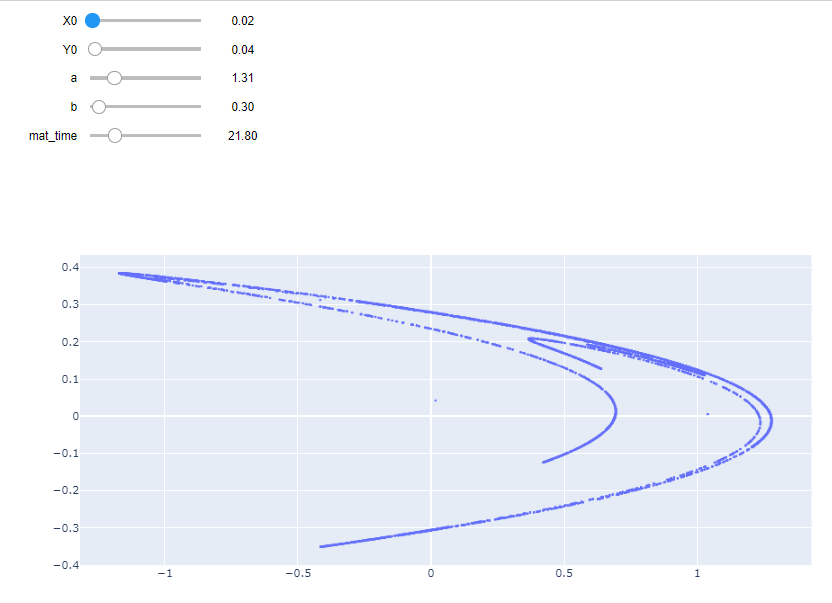

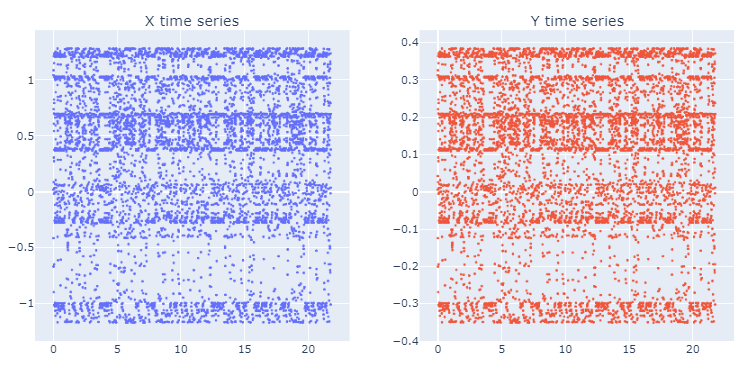

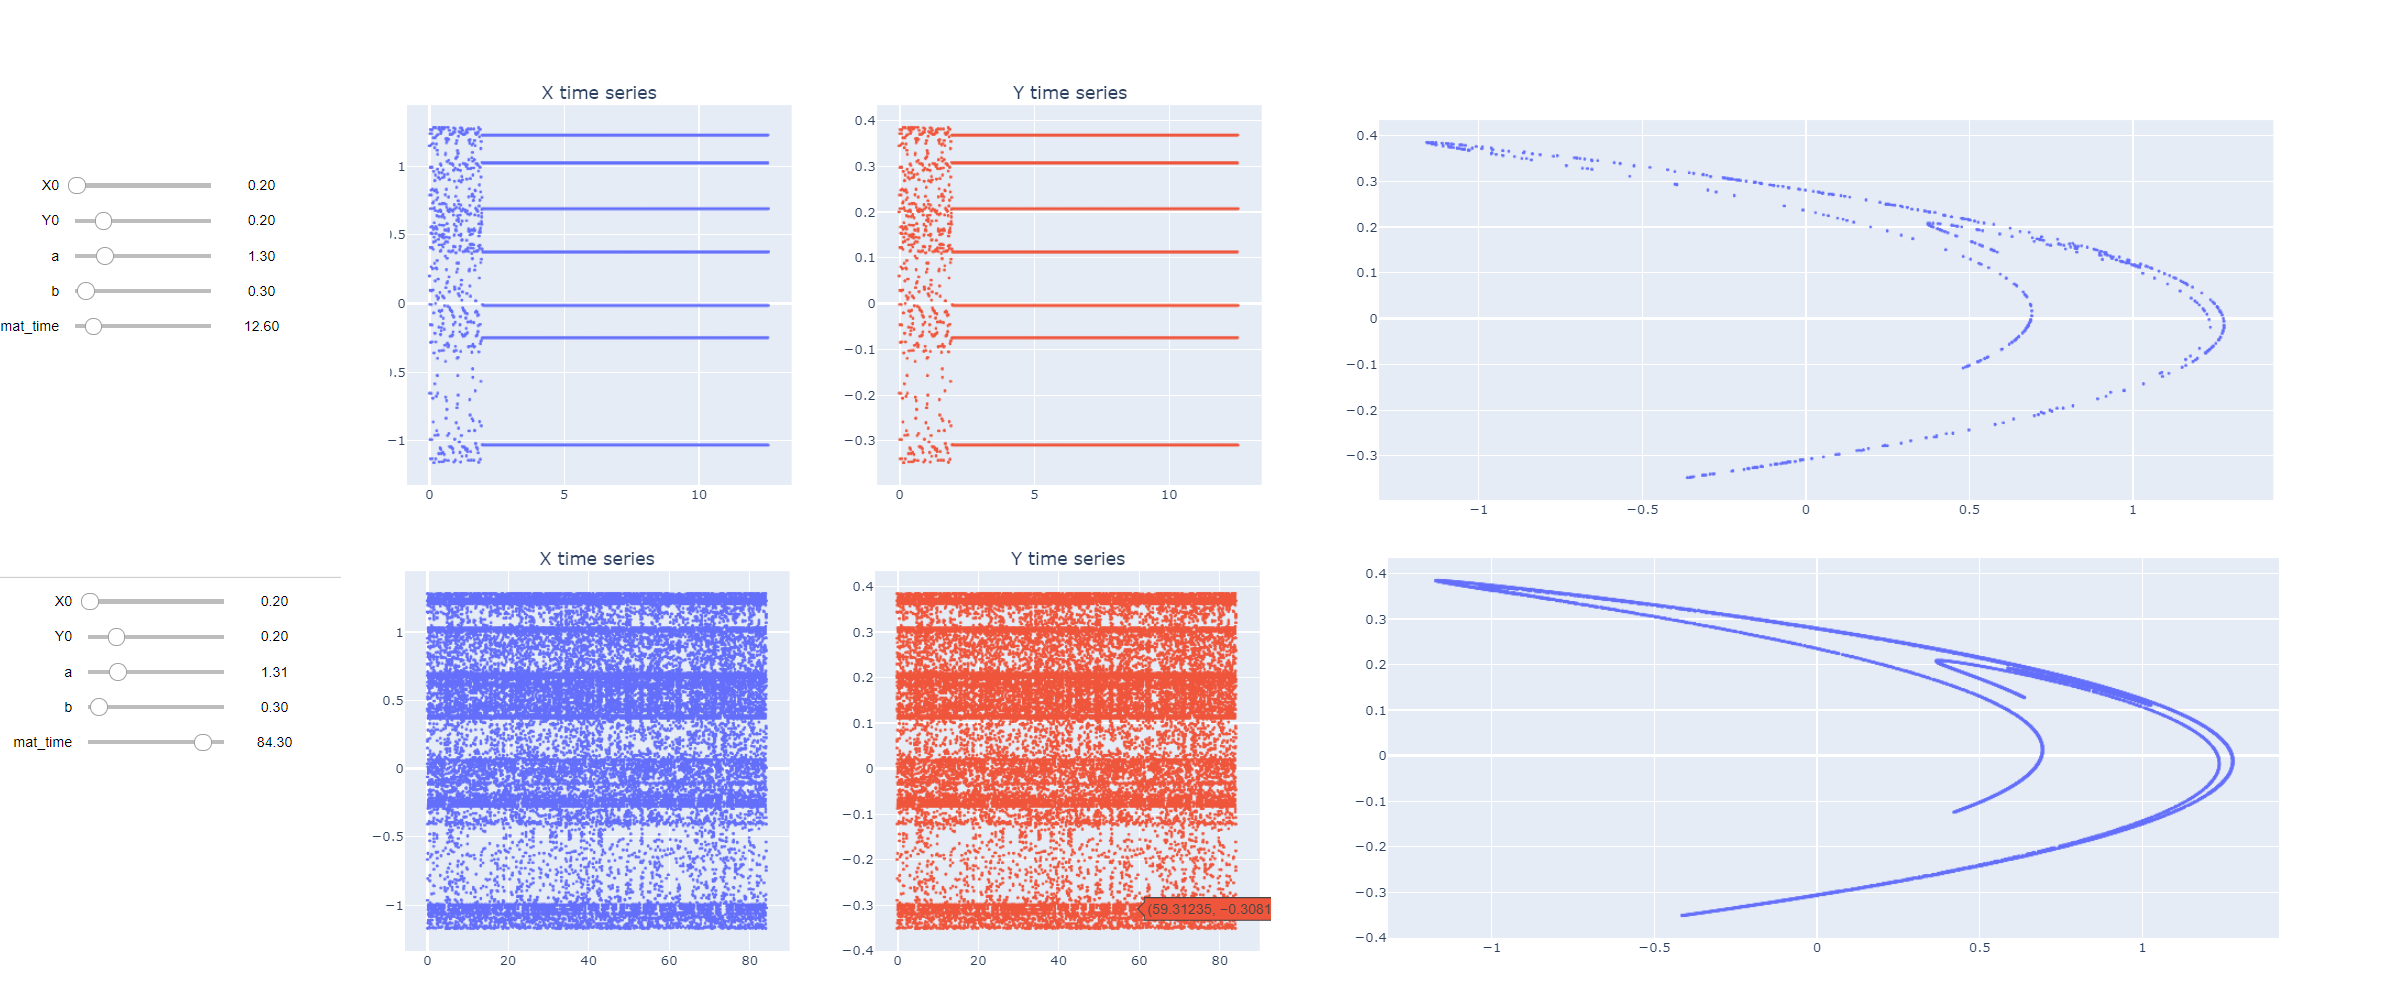

# When added some noise to the henon map the numbe rof bifurcations changes from 6 to 4 surprisingly

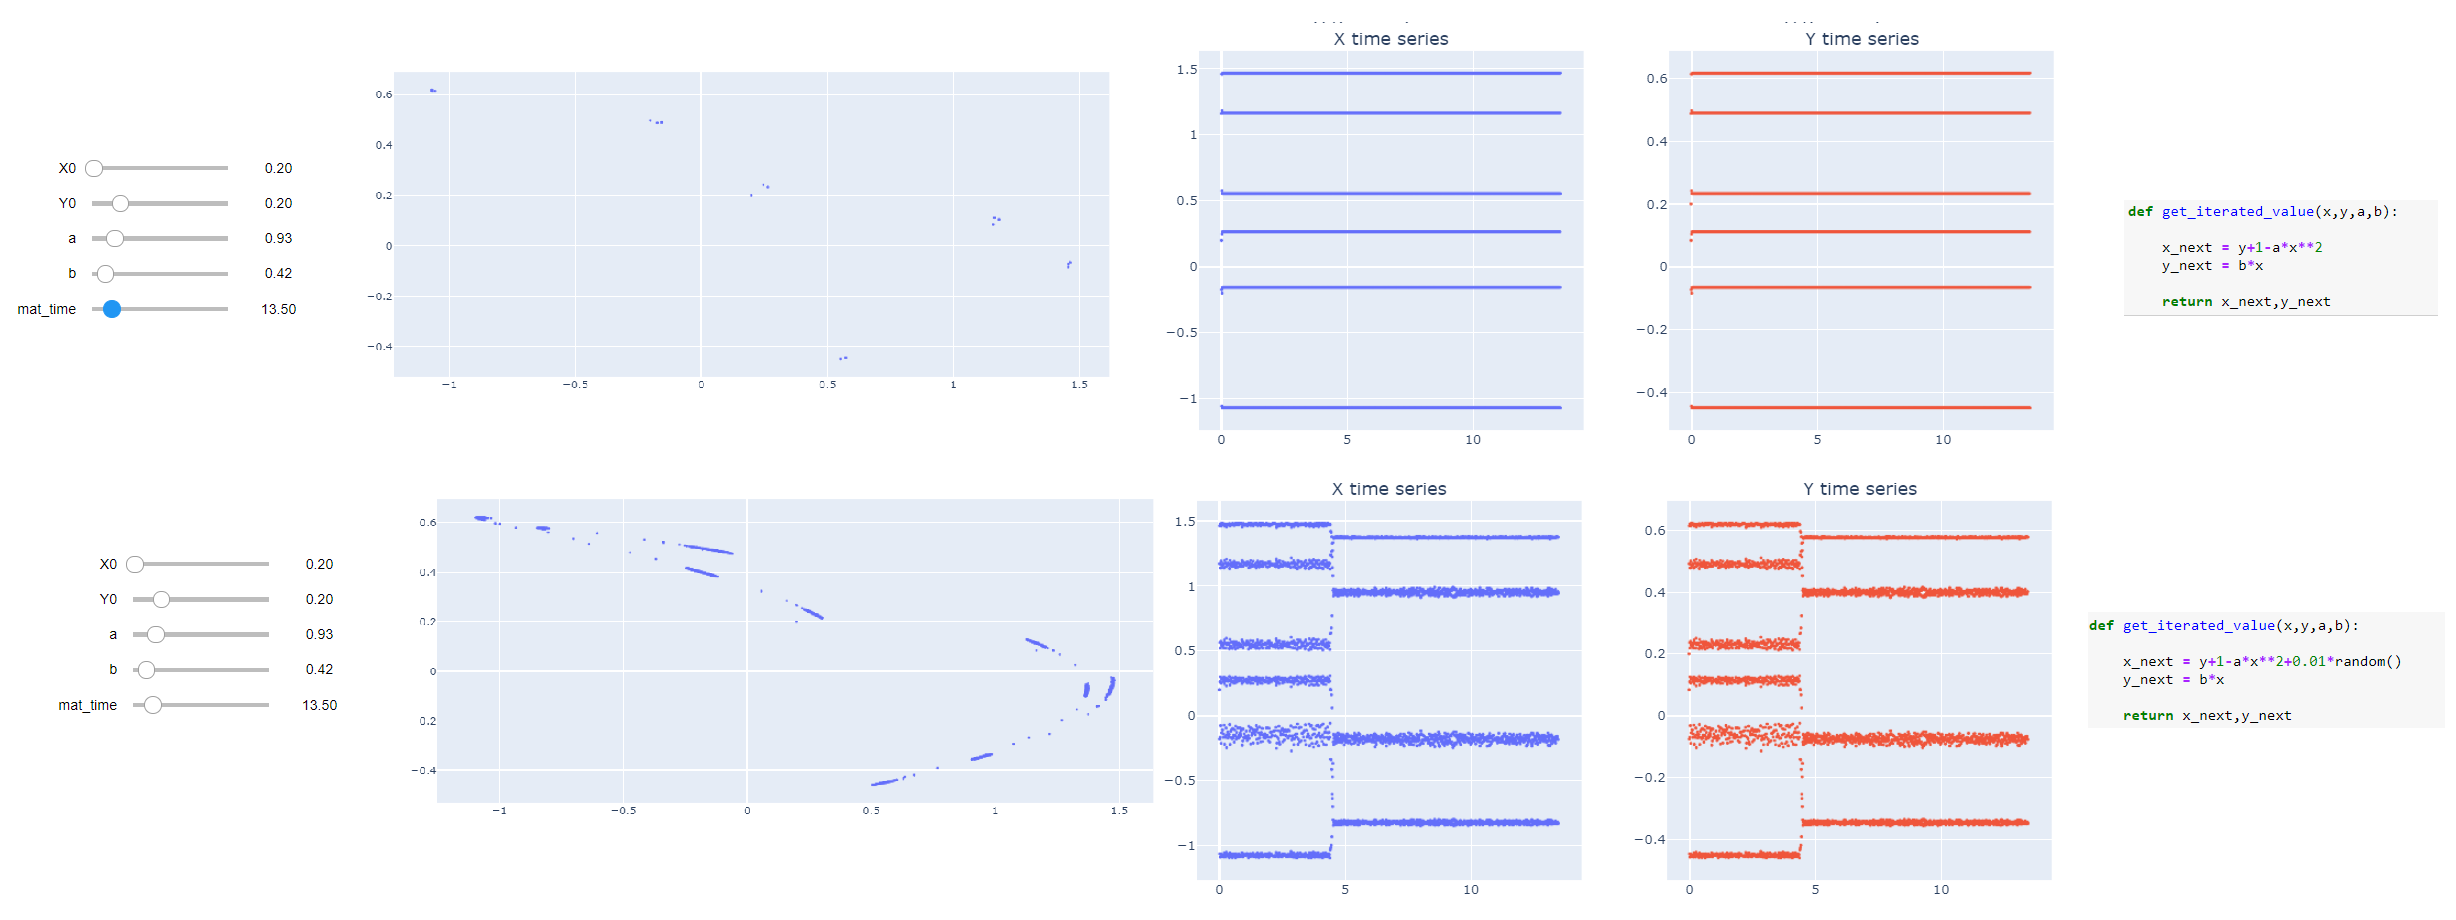

In [1]:
%%html
<iframe src="http://experiences.math.cnrs.fr/L-attracteur-de-Henon.html" width="1000" height="800"></iframe>